In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from init import *

from sklearn.decomposition import PCA, KernelPCA

In [ ]:
df

explained variance ratio (first two components): [ 0.7942779   0.11936422]


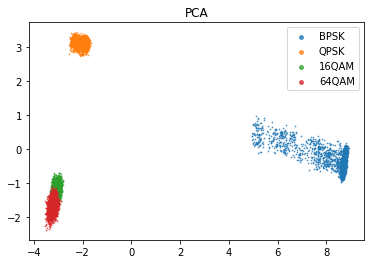

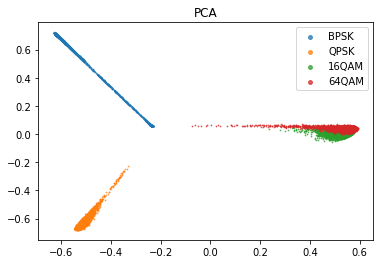

In [6]:
# config
features = all_features
dfi = df.copy()
dfi = dfi[dfi['y', 'mod_type'] == 'SC']
#dfi = dfi[dfi['y', 'mod'] != 'BPSK']
dfi = dfi[dfi['y', 'connection'] == 'ota']
dfi = dfi[dfi['y', 'snr_class'] == '20db']
X = dfi['X']
y = dfi['y']

#y.loc[:,'mod_scheme'] = y.loc[:, ['mod_type', 'mod']].apply('_'.join, axis=1)
#y = y.drop(["mod_type", "mod"], axis = 1)

# drop redundant labels
nunique = y.apply(pd.Series.nunique)
redundant_labels = nunique[nunique == 1].index
y = y.drop(redundant_labels, axis=1).values.ravel()

###
# PCA


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

colors = iter(color_array_solid)
fig, ax = plt.subplots()
for mod in mods:
    ax.scatter(X_r[y == mod, 0], X_r[y == mod, 1], color=next(colors), alpha=.75, label=mod, marker='.', s=2)
    
legnd = ax.legend(loc=1)  
for handle in legnd.legendHandles:
    handle.set_sizes([60.0])
plt.title('PCA')
plt.show()


###
# Kernel PCA

k_pca = KernelPCA(n_components=2, kernel ='rbf', gamma=0.1, n_jobs=-1)
X_r = k_pca.fit(X).transform(X)

colors = iter(color_array_solid)
fig, ax = plt.subplots()
for mod in mods:
    ax.scatter(X_r[y == mod, 0], X_r[y == mod, 1], color=next(colors), alpha=.75, label=mod, marker='.', s=2)
    
legnd = ax.legend(loc=1)  
for handle in legnd.legendHandles:
    handle.set_sizes([60.0])
plt.title('PCA')
plt.show()


In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

colors = iter(color_array_solid)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for mod in mod_schemes:
    ax.scatter(X_r[y == mod, 0], X_r[y == mod, 1], X_r[y == mod, 2], color=next(colors), alpha=.75, label=mod, marker='.', s=2)

plt.title("3 dimensional PCA")

plt.show()


In [ ]:
##################################################
########## MAIN

if __name__ == "__main__":
    print("Hello")